<a href="https://colab.research.google.com/github/ed-chin-git/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141 MONDAY
## Statistics, Probability, and Inference

## Reference Materials
[definition of Frequentist inference](https://en.wikipedia.org/wiki/Frequentist_inference)

[Null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis)

[Understanding the t-distribution and its normal approximation ](https://rpsychologist.com/d3/tdist/)

[Student's t-Distribution](https://homepage.stat.uiowa.edu/~mbognar/applets/t.html)

[stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

[LECTURE: Probability, Statistics, and Inference with Aaron Gallant](https://www.youtube.com/watch?time_continue=3&v=drcOsL4NbR4)

[Hypothesis Testing - Proportion Example](https://www.youtube.com/watch?v=5LFhu0vGzkI)

[T Statistic: Definition, Types and Comparison to Z Score](https://www.statisticshowto.datasciencecentral.com/t-statistic/)


###Can We Accept the Null Hypothesis?
Some researchers say that a hypothesis test can have one of two outcomes: you accept the null hypothesis or you reject the null hypothesis. Many statisticians, however, take issue with the notion of "accepting the null hypothesis." Instead, they say: you reject the null hypothesis or you fail to reject the null hypothesis.

Why the distinction between "acceptance" and "failure to reject?" Acceptance implies that the null hypothesis is true. Failure to reject implies that the data are not sufficiently persuasive for us to prefer the alternative hypothesis over the null hypothesis.



###Imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

####BInary Search       Code challenge
Can you do this with O(lg n) runtime complexity?

[What does the time complexity O(log n) actually mean?](https://hackernoon.com/what-does-the-time-complexity-o-log-n-actually-mean-45f94bb5bfbf)

[What’s the simple explanation for O(n log n) ? ](https://www.quora.com/What%E2%80%99s-the-simple-explanation-for-O-n-log-n)
]


In [25]:
def find_rotation_point(words):
  first_word = words[0]
  floor_index = 0
  ceiling_index = int(len(words) - 1)

  while floor_index < ceiling_index:
      # Guess a point halfway between floor and ceiling
      guess_index = int(floor_index + ((ceiling_index - floor_index) / 2))
      # If guess comes after first word or is the first word
      if words[guess_index] >= first_word:
          # Go right
          floor_index = guess_index
      else:
          # Go left
          ceiling_index = guess_index

      # If floor and ceiling have converged
      if floor_index + 1 == ceiling_index:
          # Between floor and ceiling is where we flipped to the beginning
          # so ceiling is alphabetically first
          return ceiling_index

words = [
    'ptolemaic',
    'retrograde',
    'supplant',
    'undulate',
    'xenoepist',
    'asymptote',  #---this rotation point  print out # 5
    'babka',
    'banoffee',
    'engender',
    'karpatka',
    'othellolagkage']

print (find_rotation_point(words))


5


#### Using   df .map    to encode strings into ordinals(ints)

In [0]:
columns = ['carat', 'cut', 'price']

train = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 422],
        [0.31, 'Ideal', 489],
        [0.42, 'Premium', 737],
        [0.5, 'Ideal', 1415],
        [0.51, 'Premium', 1177],
        [0.7, 'Fair', 1865],
        [0.73, 'Fair', 2351],
        [1.01, 'Good', 3768],
        [1.18, 'Very Good', 3965],
        [1.18, 'Ideal', 4838]])

test  = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 432],
        [0.34, 'Ideal', 687],
        [0.37, 'Premium', 1124],
        [0.4, 'Good', 720],
        [0.51, 'Ideal', 1397],
        [0.51, 'Very Good', 1284],
        [0.59, 'Ideal', 1437],
        [0.7, 'Ideal', 3419],
        [0.9, 'Premium', 3484],
        [0.9, 'Fair', 2964]])

# encode strings into ordinals
cut_levels = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_levels)
test.cut = test.cut.map(cut_levels)

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [27]:
##  from scipy import stats  above
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [28]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [29]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [30]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

### In Class

who likes Pepsi or Coke   (0 or 1) 


In [31]:
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]
df=pd.DataFrame(survey_data)
df.describe()

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


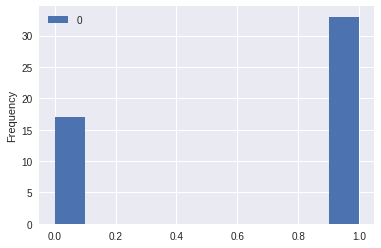

In [32]:
df.plot.hist()

####Reject the Null hypothesis

In [33]:
# Now with confidence!

import scipy
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [34]:
# the t-statistic is the ratio of the departure of the estimated value of  a
# parameter from its hypothesized value to its standard error

# We want to calculate: tstat = 2.364321853156195
std_dev=0.478518
sample_size=len(survey_data)
sample_stderr = std_dev/ np.sqrt(sample_size)
sample_mean = 0.660000
null_hypothesis_mean = 0.5

t_stat = (sample_mean - null_hypothesis_mean) / sample_stderr
print(t_stat)

2.364322449518046


#### Reproduce it

In [35]:
import random
def make_soda_data(n=50):
  return pd.DataFrame([random.randint(0,1) for _ in range(n)])
make_soda_data().describe()

,0
count,50.000000
mean,0.480000
std,0.504672
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [36]:
t_statistics = []
p_values = []
n_experiments = 10000

for _ in range(n_experiments):
  df = make_soda_data(n=500)
  ttest = scipy.stats.ttest_1samp(df, 0.5)
  t_statistics.append(ttest.statistic)
  p_values.append(ttest.pvalue)

pd.DataFrame(t_statistics).describe()

,0
count,10000.000000
mean,0.014043
std,0.997863
min,-3.527969
25%,-0.625718
50%,0.000000
75%,0.648086
max,3.620776


In [37]:
pd.DataFrame(p_values).describe()

,0
count,10000.000000
mean,0.503580
std,0.290978
min,0.000324
25%,0.245318
50%,0.531786
75%,0.788749
max,1.000000


## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

### Preliminary Data Analysis
[from here](https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data)
4. Relevant Information:
      This data set includes votes for each of the U.S. House of
      Representatives Congressmen on the 16 key votes identified by the
      CQA.  The CQA lists nine different types of votes: voted for, paired
      for, and announced for (these three simplified to yea), voted
      against, paired against, and announced against (these three
      simplified to nay), voted present, voted present to avoid conflict
      of interest, and did not vote or otherwise make a position known
      (these three simplified to an unknown disposition).

5. Number of Instances: 435 (267 democrats, 168 republicans)

6. Number of Attributes: 16 + class name = 17 (all Boolean valued)

In [60]:
#  LOAD DATA
data_url='https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
df = pd.read_csv(data_url, header=None)
print(df.shape)
df.describe()

(435, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


7. Attribute Information:
   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)

8. Missing Attribute Values: Denoted by "?"

   NOTE: It is important to recognize that "?" in this database does not mean that the value of the attribute is unknown.  It  means simply, that the value is not "yea" or "nay" (see  "Relevant Information" section above).

9. Class Distribution: (2 classes)
   1. 45.2 percent are democrat
   2. 54.8 percent are republican

In [61]:
# clean the data

# rename the columns/features
column_names = {0 :"party",
            1 : "handicappedInfants",
            2 : "water-project-cost-sharing",
            3 : "adoption-of-the-budget-resolution",
            4 : "physician-fee-freeze",
            5 : "el-salvador-aid",
            6 : "religious-groups-in-schools",
            7 : "anti-satellite-test-ban",
            8 : "aid-to-nicaraguan-contras",
            9 : "mx-missile",
            10 : "immigration",
            11 : "synfuels-corporation-cutback",
            12 :"education-spending",
            13 : "superfund-right-to-sue",
            14 : "crime",
            15 : "duty-free-exports",
            16 : "export-administration-act-south-africa"}
df.rename(column_names, axis='columns', inplace=True)

#  encode ordinals
df.replace(to_replace='?', value=np.nan, inplace=True) # replace ? with Nan
df.replace(to_replace='y', value=1, inplace=True)  #  encode y = 1
df.replace(to_replace='n', value=0, inplace=True)  # encode n = 0

df.isnull().sum()

party                                       0
handicappedInfants                         12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [0]:
dfdemocrat = df[df.party == "democrat"]
dfrepublican = df[df.party == "republican"]

### Perform Hypothesis Test on GOP issue : Crime

In [64]:
print('Dem votes for crime issues =',dfdemocrat.crime.sum(), 'out of',dfdemocrat.crime.shape[0])
print('Rep votes for crime issues =',dfrepublican.crime.sum(), 'out of',dfrepublican.crime.shape[0])
stats.ttest_ind(dfdemocrat['crime'],dfrepublican['crime'], nan_policy='omit',)

Dem votes for crime issues = 90.0 out of 267
Rep votes for crime issues = 158.0 out of 168


Ttest_indResult(statistic=-16.342085656197696, pvalue=9.952342705606092e-47)

### Perform Hypothesis Test on Dems issue : Handicapped Infants 

In [65]:
print('Dem votes for handicapped-infants issues =',dfdemocrat.handicappedInfants.sum(), 'out of',dfdemocrat.handicappedInfants.shape[0])
print('Rep votes for handicapped-infants issues =',dfrepublican.handicappedInfants.sum(), 'out of',dfrepublican.handicappedInfants.shape[0])
stats.ttest_ind(dfdemocrat['handicappedInfants'],dfrepublican['handicappedInfants'], nan_policy='omit',)

Dem votes for handicapped-infants issues = 156.0 out of 267
Rep votes for handicapped-infants issues = 31.0 out of 168


Ttest_indResult(statistic=9.205264294809222, pvalue=1.613440327937243e-18)

### What happens if samples are exactly the same

In [66]:
stats.ttest_ind(dfdemocrat['handicappedInfants'],dfdemocrat['handicappedInfants'], nan_policy='omit',)

Ttest_indResult(statistic=0.0, pvalue=1.0)

###Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01

In [70]:
print("Issues supported by more Dem's than GOP p_value < 0.01")

for col in dfdemocrat.columns.values:
  if col != "party":
    statistics, pvalue = stats.ttest_ind(dfdemocrat[col], 
                          dfrepublican[col], 
                          nan_policy='omit',
                          equal_var=True)
    if statistics > 0 and pvalue < 0.01:
      print("{:>40} {:10.3} {:>15.2}".format(col, statistics, pvalue))

Issues supported by more Dem's than GOP p_value < 0.01
                      handicappedInfants       9.21         1.6e-18
       adoption-of-the-budget-resolution       23.2         2.1e-77
                 anti-satellite-test-ban       12.5         8.5e-31
               aid-to-nicaraguan-contras       18.1         2.8e-54
                              mx-missile       16.4           5e-47
            synfuels-corporation-cutback       8.29         1.6e-15
                       duty-free-exports       12.9           6e-32
  export-administration-act-south-africa       6.85         3.7e-11


###Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01

In [69]:
print("Issues with more GOP support than Dem's with p-value < 0.01")

for col in dfdemocrat.columns.values:
  if col != "party":
    statistics, pvalue = stats.ttest_ind(dfdemocrat[col], 
                          dfrepublican[col], 
                          nan_policy='omit',
                          equal_var=True)
    if statistics < 0 and pvalue < 0.01:
      print("{:>40} {:10.3} {:>15.2}".format(col, statistics, pvalue))

Issues with more GOP support than Dem's with p-value < 0.01
                    physician-fee-freeze      -49.4          2e-177
                         el-salvador-aid      -21.1         5.6e-68
             religious-groups-in-schools      -9.74         2.4e-20
                      education-spending      -20.5         1.9e-64
                  superfund-right-to-sue      -13.5         1.2e-34
                                   crime      -16.3           1e-46


### Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1
(i.e. there may not be much of a difference)

In [52]:
print("Issues where the difference between republicans and democrats has p > 0.1")
print("(i.e. there may not be much of a difference)")
for col in dfdemocrat.columns.values:
  if col != "classname":
    statistics, pvalue = stats.ttest_ind(dfdemocrat[col], 
                          dfrepublican[col], 
                          nan_policy='omit',
                          equal_var=True)
    if pvalue > 0.01:
      print("{:40} {:<18.3} {:.4}".format(col, statistics, pvalue))

Issues where the difference between republicans and democrats has p > 0.1
(i.e. there may not be much of a difference)
water-project-cost-sharing               -0.089             0.9292
immigration                              -1.74              0.0833


###  Interview questions
What is Frequency Perspective

An interpretation of probability that defines an event's probability as the limit of its relative frequency in a large number of trials

 What is P-Value?

Probability Value
 used in hypothesis testing to determine if null hypothesis is rejected or we fail to reject it

 What is Ttest
 
 A type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related

 What is Null Hypothesis(H0)?
 
 Default position that there is no relationship between two measured phenomena. A null hypothesis is a type of hypothesis used in statistics that proposes no statistical significance exists in a set of given observations. The null hypothesis attempts to show that no variation exists between variables OR that a single variable is no different than its mean. H0 is presumed to be true until statistical evidence nullifies it for an alternative hypothesis.

 
 What is Degree of Freedom?
 Freedom to Vary